# Decision Trees & Random Forests
* The Decision Trees and Random Forests are two versatile machine learning models that are applicable to many machine learning tasks.

# General Machine Learning Steps
1. Data collection, preprocessing (e.g., integration, cleaning, etc.), and exploration;
    * Split a dataset into the training and testing datasets
    *  資料收集、前處理、分成測試和訓練資料集
2. Model development:
    * A. Assume a model {$f$} that is a collection of candidate functions $f$’s (representing posteriori knowledge) we want to discover. Let's assume that each f is parametrized by w;
    * A. 假設model {$f$}是收集我們想要找到候選(可能)function $f$，我們先假設$f$已經被$w$參數化
    * B. Define a cost function C(w) that measures "how good a particular f can explain the training data." The lower the cost function the better;
    * B. 定義cost function$C$($w$)，主要是為了測量$f$在training data的情況下的好壞，loss越低越好
3. Training: employ an algorithm that finds the best (or good enough) function f∗ in the model that minimizes the cost function over the training dataset;
    * 利用演算法找出最好的function $f$ 能夠在training dataset上loss最小
4. Testing: evaluate the performance of the learned f∗ using the testing dataset;
    * 利用testing dataset去衡量$f*$的實際表現如何
5. Apply the model in the real world.

# Decision Tree Classification
* Now, consider a classification task defined over the Wine dataset: to predict the type (class label) of a wine (data point) based on its 13 constituents (attributes/variables/features). Followings are the steps we are going to perform:

1. Randomly split the Wine dataset into the training dataset $\mathbb{X}^{train}=\{(x^{(i)},y^{(i)})\}_i$ and testing dataset $\mathbb{X}^{test}=\{(x^{ '(i)},y^{ '(i)})\}_i$
    * 將dataset隨機分成training dataset和testing dataset
2. Model development:
    * A. Model: $\{f(x)=y\}$ where each f represents a decision tree;
    * A. Model: 每個$f$代表一個decision tree
    * B. Cost function: the entropy (impurity) of class labels of data corresponding to the leaf nodes;
    * B. 
3. Training: to grow a tree f∗ by recursively splitting the leaf nodes such that each split leads to the maximal information gain over the corresponding training data;
4. Testing: to calculate the prediction accuracy using the testing dataset.
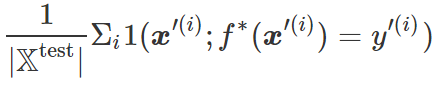
5. Visualize $f∗$ so we can interpret the meaning of rules.

# Entropy and Gini impurity
* 在訓練過程中決策樹會問出一系列的問題像是溫度是否>125之類的是非問題
* 由於我們希望獲得的資訊量要最大，因此經由分割後的資訊量要越小越好，常見的資訊量有兩種：熵(Entropy) 以及 Gini不純度(Gini Impurity)

### Entropy
<img src="https://cdn-images-1.medium.com/max/1600/1*_otZEQ9iVAJirblwdVnIIw.png" width="450">

### Gini impurity
<img src="https://cdn-images-1.medium.com/max/1600/1*WXHY6siVegJRKcFqxCRSYQ.png" width="450">

### Example
* 假設有80筆資料，有40是1類別、40筆是2類別。使用兩種不同的切割方法，第一種切割法（Ａ）會變把資料變成各40筆，其中左邊那份包含30筆1類別資料、10筆2類別資料，右邊包含10筆1類別資料、30筆2類別資料。第二種切割法（Ｂ）會把資料切成60/20筆，其中左邊那份包含20筆1類別資料、40筆2類別資料，右邊那份包只含了20筆1類別的資料。
<img src="https://cdn-images-1.medium.com/max/1600/1*ep1NsolWzPR-yeVobyNo4A.png" width="400">

### Entropy
<img src="https://cdn-images-1.medium.com/max/1600/1*IDMgYGnAzQfAIcTObS6pSA.png" width="300">

### Gini impurity
<img src="https://cdn-images-1.medium.com/max/1600/1*b_IYv0W-gCsGwRpAelFLnQ.png" width="300">

* 我們可以發現不管是Entropy或是Gini impurity，都比較偏好第二種切割方法(B)
* [Reference](https://medium.com/@yehjames/%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90-%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E7%AC%AC3-5%E8%AC%9B-%E6%B1%BA%E7%AD%96%E6%A8%B9-decision-tree-%E4%BB%A5%E5%8F%8A%E9%9A%A8%E6%A9%9F%E6%A3%AE%E6%9E%97-random-forest-%E4%BB%8B%E7%B4%B9-7079b0ddfbda)

# Preparing Data
* In code, line 21 決定要怎麼分割data
* Prepare the training and testing datasets:

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine

df = pd.read_csv('http://mlr.cs.umass.edu/ml/machine-learning-databases/wine/wine.data', header=None)

df.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
              'Alcalinity of ash', 'Magnesium', 'Total phenols',
              'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 
              'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

display(df.head())

X = df.drop('Class label', 1)
y = df['Class label']
#X, y = df.iloc[:, 1:].values, df.iloc[:, 0].values

# split X into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

print('#Training data points: %d' % X_train.shape[0])
print('#Testing data points: %d' % X_test.shape[0])
print('Class labels:', np.unique(y))

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


#Training data points: 124
#Testing data points: 54
Class labels: [1 2 3]


# Training
* The [Scikit-learn](https://scikit-learn.org/stable/) package provides the off-the-shelf implementation of various machine learning models/algorithms, including the decision trees. 
* <font color=Red>NOTE</font>: you are not required to standardize the data features before building a decision tree (or a random forest) because the information gain of a cutting point does not change when we scale values of an attribute.
* We can simply use it to build a decision tree for our training set:

In [2]:
from sklearn.tree import DecisionTreeClassifier

# criterion : impurity function
# max_depth : maximum depth of tree
# random_state : seed of random number generator
tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=3, 
                              random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

# Testing
* Let's apply it to our testing set to see how it performs:

In [3]:
y_pred = tree.predict(X_test)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy (tree): %.2f' % ((y_test == y_pred).sum() / y_test.shape[0]))

# a more convenient way to evaluate a trained model is to use the sklearn.metrics 
from sklearn.metrics import accuracy_score
print('Accuracy (tree, sklearn): %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 2
Accuracy (tree): 0.96
Accuracy (tree, sklearn): 0.96


# Visualization
* By visualizing a tree, we can understand how a prediction is made by breaking down a classification rule into a series of questions about the data features.
* A nice feature of the DecisionTreeClassifier in Scikit-learn is that it allows us to export the decision tree as a .dot file after training, which we can visualize using the [GraphViz](http://www.graphviz.org/) program.
* Convert the tree.dot file into a PNG file by executing the following GraphViz
* GraphViz command from the command line under the same directory where tree.dot resides:]
    * \> dot -Tpng tree.dot -o fig-tree.png

In [4]:
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file='./output/tree.dot', 
                feature_names=X.columns.values)

# <a name='Randomforest'>Random Forests</a>
* Intuitively, a random forest can be considered as an ensemble of decision trees.
* The idea behind ensemble learning is to combine weak learners to build a more robust model, a strong learner, that has a better generalization performance.
* The random forest algorithm can be summarized in four simple steps:

1. Randomly draw $M$ [bootstrap samples](#bootstrap) from the training set with replacement;
2. Grow a decision tree from the bootstrap samples. At each node:
    * A. Randomly select $K$ features without replacement;
    * B. Split the node by finding the best cut among the selected features that maximizes the information gain;
3. Repeat the steps 1 to 2 $T$ times to get $T$ trees;
4. Aggregate the predictions made by different trees via the majority vote.

   * Although random forests don't offer the same level of interpretability as decision trees, a big advantage of random forests is that we don't have to worry so much about the depth of trees since the majority vote can "absorb" the noise from individual trees.
   * The only parameter that we need to care about in practice is the number of trees T at step 3.
   * Generally, the larger the number of trees, the better the performance of the random forest classifier at the expense of an increased computational cost. 
   * Another advantage is that the computational cost can be distributed to multiple cores/machines since each tree can grow independently.

# Training
* <font color='Red'>NOTE</font>: In most implementations, including the RandomForestClassifier implementation in Scikit-learn, the bootstrap sample size M is equal to the number of samples N in the original training set by default.For the number of features $K$ to select at each split, the default that is used in Scikit-learn (and many other implementations) is $K=\sqrt{D}$ , where D is the number of features of data points.
* Build a random forest by using the RandomForestClassifier in Scikit-learn:

In [5]:
from sklearn.ensemble import RandomForestClassifier

# criterion : impurity function
# n_estimators :  number of decision trees
# random_state : seed used by the random number generator
# n_jobs : number of cores for parallelism
forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=200, 
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)
print('Accuracy (forest): %.2f' % accuracy_score(y_test, y_pred))

Accuracy (forest): 0.98


# Computing Feature Importance
* In addition to classification, a random forest can be used to calculate the feature importance.
* We can measure feature importance as the averaged information gain (impurity decrease) computed from all decision trees in the forest.

 1) Flavanoids                     0.188736
 2) OD280/OD315 of diluted wines   0.162445
 3) Proline                        0.158390
 4) Color intensity                0.154620
 5) Alcohol                        0.102004
 6) Hue                            0.065470
 7) Total phenols                  0.049602
 8) Alcalinity of ash              0.030379
 9) Proanthocyanins                0.023283
10) Malic acid                     0.022439
11) Magnesium                      0.018800
12) Nonflavanoid phenols           0.012507
13) Ash                            0.011325


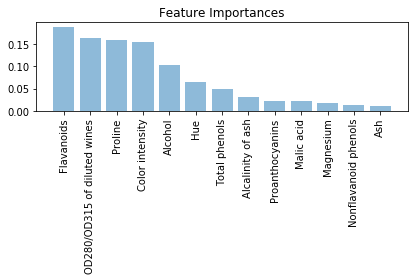

In [6]:
# inline plotting instead of popping out
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

importances = forest.feature_importances_
# get sort indices in descending order
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            X.columns.values[indices[f]], 
                            importances[indices[f]]))

plt.figure()
plt.title('Feature Importances')
#畫直方圖
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align='center',
        alpha=0.5)

plt.xticks(range(X_train.shape[1]), 
           X.columns.values[indices], rotation=90)
plt.tight_layout()
plt.savefig('./output/fig-forest-feature-importances.png', dpi=300)
plt.show()

# Feature Selection
* By discarding the unimportant features, we can reduce the dimension of data points and compress data.
* For example, $Z_{Forest}$ is a compressed 2-D dataset that contains only the most important two features "Flavanoids" and "OD280/OD315 of diluted wines:"

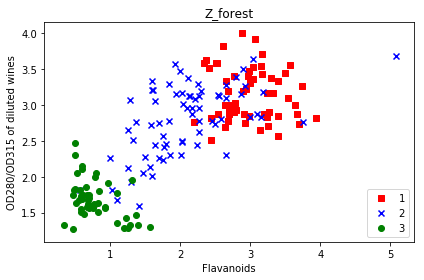

In [7]:
import matplotlib.pyplot as plt

#Select first two values
Z_forest = X[['Flavanoids', 'OD280/OD315 of diluted wines']].values

colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y.values), colors, markers):
    plt.scatter(Z_forest[y.values==l, 0], 
                Z_forest[y.values==l, 1], 
                c=c, label=l, marker=m)

plt.title('Z_forest')
plt.xlabel('Flavanoids')
plt.ylabel('OD280/OD315 of diluted wines')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('./output/fig-forest-z.png', dpi=300)
plt.show()

* <font color='Red'>NOTE</font>: It is worth mentioning that Scikit-learn also implements a class called <font color='brown'>SelectFromModel</font> that helps you select features based on a user-specified threshold, which is useful if we want to use the RandomForestClassifier as a feature selector.
* For example, we could set the threshold to 0.16 to get $Z_{Forest}$ :

In [8]:
from sklearn.feature_selection import SelectFromModel

# put prefitted RandomForestClassifier "forest" into SelectFromModel
sfm = SelectFromModel(forest, threshold=0.16, prefit=True)
Z_forest_alt = sfm.transform(X)

for f in range(Z_forest_alt.shape[1]): #mdf
    print("%2d) %-*s %f" % (f + 1, 30, 
                            X.columns.values[indices[f]], 
                            importances[indices[f]]))

 1) Flavanoids                     0.188736
 2) OD280/OD315 of diluted wines   0.162445


# Dimension Reduction: PCA vs. Random Forest
* We have seen two dimension reduction techniques: PCA and feature selection based on Random Forest.

### PCA
* PCA is an **unsupervised** dimension reduction technique since it does not require the class labels.
* PCA is a **feature extraction technique** (as opposed to feature selection) in the sense that a reduced feature may not be identical to any of the original features.

### Random Forest
* Random Forest is a **supervised dimension** reduction technique as the labels are used for computing the information gain for each node split.  

* <font color='Red'>NOTE</font>: If you don't have Z_pca.npy, you need to run the code on Lecture02 first.  
* Next, let's build classifiers for the two compressed datasets $Z_{PCA}$ and $Z_{Forest}$ and compare their performance:

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# train a decision tree based on Z_forest

Z_forest_train, Z_forest_test, y_forest_train, y_forest_test = train_test_split(
    Z_forest, y, test_size=0.3, random_state=0)

tree_forest = DecisionTreeClassifier(criterion='entropy', 
                                     max_depth=3, 
                                     random_state=0)
tree_forest.fit(Z_forest_train, y_forest_train)

y_forest_pred = tree_forest.predict(Z_forest_test)
print('Accuracy (tree_forest): %.2f' % accuracy_score(y_forest_test, y_forest_pred))

# train a decision tree based on Z_pca

# load Z_pca that we have created in our last lab
Z_pca= np.load('./Z_pca.npy')
# random_state should be the same as that used to split the Z_forest
Z_pca_train, Z_pca_test, y_pca_train, y_pca_test = train_test_split(
    Z_pca, y, test_size=0.3, random_state=0)

tree_pca = DecisionTreeClassifier(criterion='entropy', 
                                  max_depth=3, 
                                  random_state=0)
tree_pca.fit(Z_pca_train, y_pca_train)

y_pca_pred = tree_pca.predict(Z_pca_test)
print('Accuracy (tree_pca): %.2f' % accuracy_score(y_pca_test, y_pca_pred))

Accuracy (tree_forest): 0.83
Accuracy (tree_pca): 0.96


* The same holds for the Random Forest classifiers:

In [10]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# train a random forest based on Z_forest

forest_forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=200, 
                                random_state=1,
                                n_jobs=2)
forest_forest.fit(Z_forest_train, y_forest_train)

y_forest_pred = forest_forest.predict(Z_forest_test)
print('Accuracy (forest_forest): %.2f' % accuracy_score(y_forest_test, y_forest_pred))


# train a random forest based on Z_pca

forest_pca = RandomForestClassifier(criterion='entropy',
                                n_estimators=200, 
                                random_state=1,
                                n_jobs=2)
forest_pca.fit(Z_pca_train, y_pca_train)

y_pca_pred = forest_pca.predict(Z_pca_test)
print('Accuracy (forest_pca): %.2f' % accuracy_score(y_pca_test, y_pca_pred))

Accuracy (forest_forest): 0.67
Accuracy (forest_pca): 0.98


# Further Visualization
* When the data dimension is 2, we can easily plot the decision boundaries of a classifier.
*  Let's take a look at the decision boundaries of the Decision Tree and Random Forest classifiers we have for $Z_{PCA}$ and $Z_{Forest}$. 

In [11]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # meshgrid函數用兩個座標軸上的點在平面上畫網格
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))

    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    #contourf等高線圖
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set', edgecolors='k')


* Next, we plot the decision boundaries by combining the training and testing sets deterministically:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


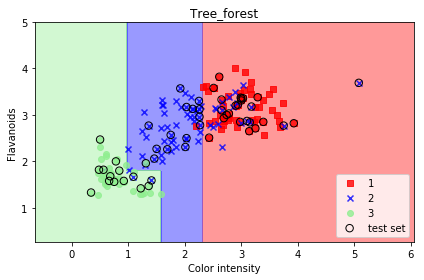

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


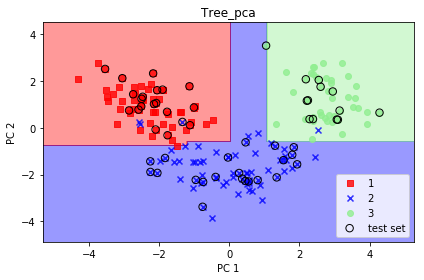

In [12]:
import numpy as np
import matplotlib.pyplot as plt
# plot boundaries of tree_forest

Z_forest_combined = np.vstack((Z_forest_train, Z_forest_test))
y_forest_combined = np.hstack((y_forest_train, y_forest_test))
plot_decision_regions(Z_forest_combined, 
                      y_forest_combined, 
                      classifier=tree_forest, 
                      test_idx=range(y_forest_train.shape[0],
                                     y_forest_train.shape[0] + y_forest_test.shape[0]))

plt.title('Tree_forest')
plt.xlabel('Color intensity')
plt.ylabel('Flavanoids')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('./output/fig-boundary-tree-forest.png', dpi=300)
plt.show()

# plot boundaries of tree_pca

Z_pca_combined = np.vstack((Z_pca_train, Z_pca_test))
y_pca_combined = np.hstack((y_pca_train, y_pca_test))
plot_decision_regions(Z_pca_combined, 
                      y_pca_combined, 
                      classifier=tree_pca, 
                      test_idx=range(y_pca_train.shape[0],
                                     y_pca_train.shape[0] + y_pca_test.shape[0]))

plt.title('Tree_pca')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('./output/fig-boundary-tree-pca.png', dpi=300)
plt.show()

* As we can see, the decision boundaries of a decision tree are always axis-aligned.
* This means that if a "true" boundary is not axis-aligned, the tree needs to be very deep to approximate the boundary using the "staircase" one. 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


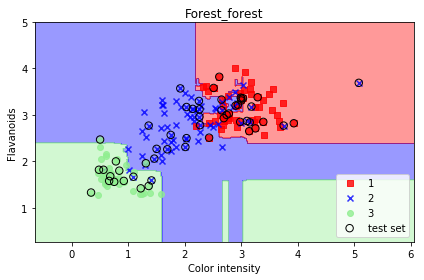

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


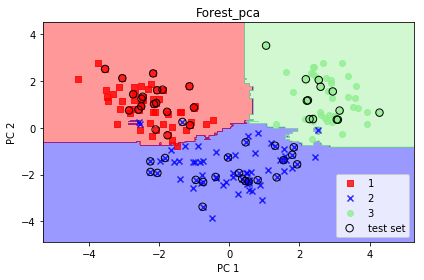

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# plot boundaries of tree_forest

plot_decision_regions(Z_forest_combined, 
                      y_forest_combined, 
                      classifier=forest_forest, 
                      test_idx=range(y_forest_train.shape[0],
                                     y_forest_train.shape[0] + y_forest_test.shape[0]))

plt.title('Forest_forest')
plt.xlabel('Color intensity')
plt.ylabel('Flavanoids')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('./output/fig-boundary-forest-forest.png', dpi=300)
plt.show()

# plot boundaries of tree_pca

plot_decision_regions(Z_pca_combined, 
                      y_pca_combined, 
                      classifier=forest_pca, 
                      test_idx=range(y_pca_train.shape[0],
                                     y_pca_train.shape[0] + y_pca_test.shape[0]))

plt.title('Forest_pca')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('./output/fig-boundary-forest-pca.png', dpi=300)
plt.show()

# Assignment
* We try to make predition from another dataset [breast cancer wisconsin](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)). But there are too many features in this dataset. Please try to improve accuracy per feature $\$\frac{accuracy}{\#feature}\$$

### HINT:
1. You can improve the ratio by picking out several important features.
2. The ratio can be improved from 0.03 up to 0.44.

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# load the breast_cancer dataset
init_data = load_breast_cancer()
(X, y) = load_breast_cancer(return_X_y=True)
# X = pd.DataFrame(data=X, columns=init_data['feature_names'])
# y = pd.DataFrame(data=y, columns=['label'])

# split X into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train a RandomForestClassifier as model 
forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=200, 
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Accuracy per feature: %.2f' % (accuracy_score(y_test, y_pred)/X.shape[1]))

Accuracy: 0.98
Accuracy per feature: 0.03


# First step: Print all first N features

In [15]:
importances = forest.feature_importances_
# get sort indices in descending order
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %f" % (f + 1, importances[indices[f]]))

 1) 0.141849
 2) 0.117697
 3) 0.110919
 4) 0.105243
 5) 0.077163
 6) 0.073364
 7) 0.041760
 8) 0.036943
 9) 0.035625
10) 0.035205
11) 0.032890
12) 0.022736
13) 0.018584
14) 0.016786
15) 0.015408
16) 0.014770
17) 0.014235
18) 0.010085
19) 0.010040
20) 0.009015
21) 0.008085
22) 0.007420
23) 0.006557
24) 0.006368
25) 0.006357
26) 0.006135
27) 0.005854
28) 0.005100
29) 0.004598
30) 0.003209


# Second step: Guess and find the threshold you want

In [16]:
sfm = SelectFromModel(forest, threshold=0.116, prefit=True)
Z_forest_alt = sfm.transform(X)

X_train, X_test, y_train, y_test = train_test_split(Z_forest_alt, y, test_size=0.3, random_state=0)

# Train a RandomForestClassifier as model 
forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=200, 
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Accuracy per feature: %.2f' % (accuracy_score(y_test, y_pred)/Z_forest_alt.shape[1]))

Accuracy: 0.89
Accuracy per feature: 0.44


### <a name="bootstrap">[1] Bootstrap Sample: Definition, Example</a> 
<img src="https://www.statisticshowto.datasciencecentral.com/wp-content/uploads/2016/10/bootstrap-sample.png">

* Bootstrapping is a type of resampling where large numbers of smaller samples of the same size are repeatedly drawn, with replacement, from a single original sample.

* For example, let’s say your sample was made up of ten numbers: 49, 34, 21, 18, 10, 8, 6, 5, 2, 1. You randomly draw three numbers 5, 1, and 49. You then replace those numbers into the sample and draw three numbers again. Repeat the process of drawing x numbers B times. Usually, original samples are much larger than this simple example, and B can reach into the thousands. After a large number of iterations, the bootstrap statistics are compiled into a bootstrap distribution. You’re replacing your numbers back into the pot, so your resamples can have the same item repeated several times (e.g. 49 could appear a dozen times in a dozen resamples).
* Bootstrapping is loosely based on the law of large numbers, which states that if you sample over and over again, your data should approximate the true population data. This works, perhaps surprisingly, even when you’re using a single sample to generate the data.
* Bootstrapping is usually performed with software (e.g. Stata or with the R Bootstrap package); The process generally follows three steps:
    1. Resample a data set x times,
    2. Find a summary statistic (called a bootstrap statistic) for each of the x samples,
    3. Estimate the standard error for the bootstrap statistic using the standard deviation of the bootstrap distribution.
* [Reference](https://www.statisticshowto.datasciencecentral.com/bootstrap-sample/)
* [Click to go back](#Randomforest)